<a href="https://colab.research.google.com/github/hemangstreamoid/ml1/blob/master/NLP_Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**N - Grams**

In [0]:
import re

def generate_ngrams (sentence, n):
    # Convert to lowercases
    sentence = sentence.lower()
    
    # Replace all none alphanumeric characters with spaces
    sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in sentence.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def generate_all_grams (sentence, n):
  return sum ([generate_ngrams (sentence, i + 1) for i in range (n)], [])

In [0]:
text = "The cat sat on the mat"
print (generate_all_grams (text, 3))

['the', 'cat', 'sat', 'on', 'the', 'mat', 'the cat', 'cat sat', 'sat on', 'on the', 'the mat', 'the cat sat', 'cat sat on', 'sat on the', 'on the mat']


**One Hot Encoding**

In [0]:
import numpy as np

#Initial data: one entry per sample (in this example, a sample is a sentence, but it could be an entire document)
samples = ['The cat sat on the mat.', 'The dog are my breakfast.']

# builds an index of all tokens in the data
token_index = {}

for sample in samples:
  # Tokensizes the samples via the split method. In real life, you'd also strip punctuation and special characters from the samples.
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1
      # assigns a unique index to each uniquq word. Note that you don't attribute index 0 to anything.

print (token_index)
# Vectorizes the samples. You'll only consider the first max_length words in each sample
max_length = 10

# This is where you store the results.
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))

for i, sample in enumerate(samples):
  print (sample)
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1
print (results)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'are': 8, 'my': 9, 'breakfast.': 10}
The cat sat on the mat.
The dog are my breakfast.
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [0]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework']

# All printable ASCII characters

characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
print (token_index)
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1
print (results)

{1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z', 37: 'A', 38: 'B', 39: 'C', 40: 'D', 41: 'E', 42: 'F', 43: 'G', 44: 'H', 45: 'I', 46: 'J', 47: 'K', 48: 'L', 49: 'M', 50: 'N', 51: 'O', 52: 'P', 53: 'Q', 54: 'R', 55: 'S', 56: 'T', 57: 'U', 58: 'V', 59: 'W', 60: 'X', 61: 'Y', 62: 'Z', 63: '!', 64: '"', 65: '#', 66: '$', 67: '%', 68: '&', 69: "'", 70: '(', 71: ')', 72: '*', 73: '+', 74: ',', 75: '-', 76: '.', 77: '/', 78: ':', 79: ';', 80: '<', 81: '=', 82: '>', 83: '?', 84: '@', 85: '[', 86: '\\', 87: ']', 88: '^', 89: '_', 90: '`', 91: '{', 92: '|', 93: '}', 94: '~', 95: ' ', 96: '\t', 97: '\n', 98: '\r', 99: '\x0b', 100: '\x0c'}
[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. .

In [0]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# creates a tokenizer, configured to only take into account the 1000 most common words.
tokenizer = Tokenizer(num_words=1000)

# builds the word index
tokenizer.fit_on_texts(samples)

# turns strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)
print (sequences)

#you could also directly get the one-hot binary representations. Vectorization modes other than one-hot encoding are supported by this tokenizer.
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print (one_hot_results)

# how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Found 9 unique tokens.


In [0]:
#stores the words as vectors of size 1000. If you have close to 1000 words (or more), you'll see many hash collisions, which will decrease the accuracy of this encoding method.

dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(samples):
  print (sample)
  for j, word in list(enumerate(sample.split()))[:max_length]:
  # hashes the word into a random integer index between 0 and 1000
    index = abs(hash(word)) % dimensionality
    print (word, i, j, index)
    results[i, j, index] = 1
print (results)

The cat sat on the mat.
The 0 0 589
cat 0 1 792
sat 0 2 88
on 0 3 238
the 0 4 476
mat. 0 5 620
The dog ate my homework.
The 1 0 589
dog 1 1 780
ate 1 2 951
my 1 3 983
homework. 1 4 681
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


**Word Embeddings**

In [0]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1
[  65   16   38 1334   88   12   16  283    5   16 4472  1

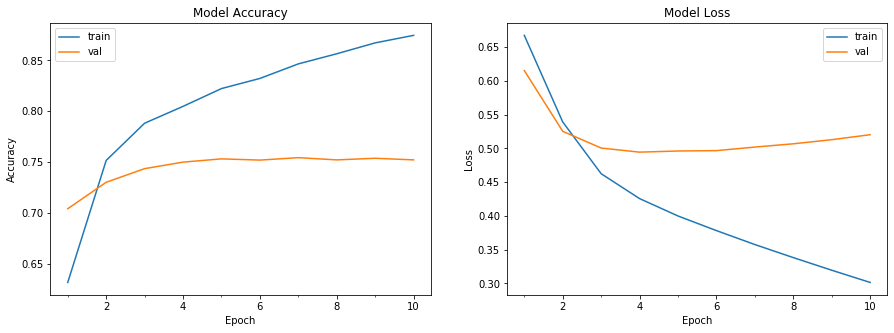

In [0]:
from keras.layers import Embedding

#the embedding layer take at least two arguments: the number of possible tokens (here, 1000: 1 + max word index) and the dimensionality of the embeddings (here, 64).
embedding_layer = Embedding(1000, 64)

from keras.datasets import imdb
from keras import preprocessing

# number of words to consider as features
max_features = 10000

# cuts off the text after 20 number of words
maxlen = 20

# loads the data as lists of integer
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print (x_train[0], y_train[0])

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print (x_train[0], y_train[0])

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# specifies the max input length to the Embedding layer so you can later flatten the embedded inputs. After the Embedding layer, the activations have shape (samples, maxlen, 8)
model.add(Embedding(10000, 8, input_length=maxlen))

# flattens the 3D tensor of embeddings into a 2D tensor of shape (Samples, maxlen*8)
model.add(Flatten())

# adds the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model_info = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plot_model_history (model_info)

In [0]:
print (x_train[0], y_train)

[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32] [1 0 0 ... 0 1 0]


In [0]:
embedding_layer.weights

[]

In [0]:
!wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/MB.txt
!wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/stopwords.txt

--2020-01-29 14:30:27--  https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/MB.txt
Resolving cdn.talentsprint.com (cdn.talentsprint.com)... 172.105.34.236
Connecting to cdn.talentsprint.com (cdn.talentsprint.com)|172.105.34.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14571473 (14M) [text/plain]
Saving to: ‘MB.txt’

MB.txt              100%[===================>]  13.90M  4.89MB/s    in 2.8s    

2020-01-29 14:30:31 (4.89 MB/s) - ‘MB.txt’ saved [14571473/14571473]

--2020-01-29 14:30:33--  https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/stopwords.txt
Resolving cdn.talentsprint.com (cdn.talentsprint.com)... 172.105.34.236
Connecting to cdn.talentsprint.com (cdn.talentsprint.com)|172.105.34.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2456 (2.4K) [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]   2.40K  --.-KB/s    in

In [0]:
!ls

MB.txt	sample_data  stopwords.txt


In [0]:
#vector space modeling and topic modeling toolkit
import gensim

# Operating System
import os

# Regular Expression
import re

# nltk packages
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

# Basic Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# PCA from scikit learn
from sklearn.decomposition import PCA

In [0]:
stemmer = SnowballStemmer("english")
!head stopwords.txt

 
a
about
above
across
after
again
against
all
almost


In [0]:
stopWords = pd.read_csv('stopwords.txt').values

class MySentences(object):
    def __init__(self, fnamelist):
        self.fnamelist = fnamelist
        # Creating a set of vocabulary
        self.vocabulary = set([])

    def __iter__(self):
        for fname in self.fnamelist:
            for line in open(fname, encoding='latin1'):
                words = re.findall(r'(\b[A-Za-z][a-z]{2,15}\b)', line)
                # Stemming a word.
                words = [ stemmer.stem(word.lower()) for word in words if not word.lower() in stopWords]
                for word in words:
                    self.vocabulary.add(word)
                yield words

In [0]:
import time
t = time.time ()
sentences = MySentences(['MB.txt'])
model = gensim.models.Word2Vec(sentences, min_count=100)
print ("time taken : ", time.time() - t)

time taken :  304.75190591812134


In [0]:
characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
for character in characters:
    near = model.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:vikarna:chitrasena:valhika
sakuni	dussasana:duhsasana:vikarna:suvala:valhika
duryodhana	dussasana:suyodhana:sakuni:jayadratha:dhritarashtra
bhishma	salya:sanjaya:vaisampayana:savyasachin:kripa
krishna	kesava:vasudeva:govinda:madhava:dhananjaya
madri	somadatta:prishata:subhadra:suvala:valiant
pandu	pritha:kunti:radha:suta:subhadra
kunti	pritha:radha:pandu:suta:santanu
karna	yuyudhana:duhsasana:abhimanyu:bhagadatta:vikarna
bhima	bhimasena:vrikodara:abhimanyu:satyaki:lakshmana
arjuna	partha:dhananjaya:vibhatsu:kama:vrikodara
nakula	sahadeva:vikarna:duhsasana:aswatthaman:chitrasena
sahadeva	nakula:vikarna:dhrishtadyumna:duhsasana:satyaki
draupadi	drupada:sakuni:dussasana:uncl:madri


[1464, 1441, 1627, 1626, 1522, 19, 1245, 1500, 1232, 245, 1659, 1572, 1381, 1646, 1531, 1603]
[-0.40153238 -0.97524308]
govinda


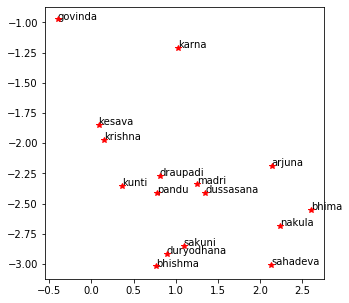

In [0]:
characters = ['govinda','kesava','dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
words_list = np.array([])
vector_list = np.array([])
for i in model.wv.vocab:
    try :
        words_list = np.append(words_list, i)
        vector_list = np.append(vector_list, model[i])
    except :
        pass
vector_list = vector_list.reshape(len(model.wv.vocab), -1)

pca = PCA(n_components=2)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)
print(pca.transform([model[characters[0]]])[0])
print(words_list[locs[0]])

%matplotlib inline
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model[character]
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "r*")
    #ax.scatter(value[0], value[1], value[2])
    #ax.annotate(words_list[pos], xy=value, xytext=value)
    ax.text(value[0], value[1], '%s' % (words_list[pos]), zorder=1, color='k')
plt.show()
fig.savefig('word2vec.png')

In [0]:
https://projector.tensorflow.org/
https://dbstaging.tools.streamoid.com/experiments/fashion100/

SyntaxError: ignored